<h1><span style="color: #6495ED;">Air Quality Prediction</span></h1>

<h2><span style="color: #6495ED;">Exploratory Data Analysis (EDA) and Baseline Modeling</span></h2>

Prepared by Lipsita Tripathy

Email: lipsitalt@gmail.com

December 2023

| <h2><span style="color: #FF6F61;">Table of Contents</span></h2> |
|----------------------------------------------|
| Introduction                                 |
| Dataset Overview and Preprocessing           |
| Exploratory Data Analysis (EDA)               |
| Baseline Models and Evaluation Metrics        |
| Next Steps                                   |

## Data Dictionary
The project utilizes air quality data extracted from 20 stations in Delhi for the years 2018 and 2019. The dataset comprises 12 features with instances recorded at each station.
| **Features**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| Datetime                  | Timestamp indicating the date and time of the recorded data | -          |
| StationId                 | Unique identifier for each monitoring station               | Numeric    |
| PM2.5 (ug/m3)             | Particulate Matter with a diameter of 2.5 microns or less   | Numeric    |
| PM10 (ug/m3)              | Particulate Matter with a diameter of 10 microns or less   | Numeric    |
| NO (ug/m3)                | Nitric Oxide concentration                                  | Numeric    |
| NO2 (ug/m3)               | Nitrogen Dioxide concentration                               | Numeric    |
| NOx (ug/m3)               | Sum of Nitric Oxide and Nitrogen Dioxide concentrations     | Numeric    |
| NH3 (ug/m3)               | Ammonia concentration                                       | Numeric    |
| SO2 (ug/m3)               | Sulfur Dioxide concentration                                | Numeric    |
| CO (ug/m3)                | Carbon Monoxide concentration                               | Numeric    |
| Ozone (ug/m3)             | Ozone concentration                                         | Numeric    |
| Benzene (ug/m3)           | Concentration of Benzene in the air                          | Numeric    |
| Toluene (ug/m3)           | Concentration of Toluene in the air                          | Numeric    |
| Xylene (ug/m3)            | Concentration of Xylene in the air                            | Numeric    |
| RH (%)                    | Relative Humidity in percentage                             | Numeric    |
| WS (m/s)                  | Wind Speed in meters per second                              | Numeric    |
| WD (degree)               | Wind Direction in degrees                                   | Numeric    |
| BP (mmHg)                 | Barometric Pressure in millimeters of mercury               | Numeric    |
| AT (degree C)             | Ambient Temperature in degrees Celsius                      | Numeric    |
| RF (mm)                   | Rainfall in millimeters                                     | Numeric    |
| SR (W/mt2)                | Solar Radiation in Watts per square meter                    | Numeric    |


| **Target**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| <span style="color: #FF0000;">y_AQI</span>| Target variable representing the predicted Air Quality Index for next 24 hours| Numeric    |

## Introduction

As we delve into Sprint 2 of our Air Quality Prediction project, let's reflect on the journey we began in Sprint 1. In the initial phase, we illuminated the critical issue of air pollution in Delhi, setting the stage for a comprehensive data-driven solution. Our objective is clear: harness the power of data science and machine learning to predict air quality, providing invaluable insights for decision-makers and contributing to a healthier future.

### Contextualizing the Problem

In Sprint 1, we painted a vivid picture of the air quality challenges faced by the residents of Delhi. The city's iconic landmarks, shrouded in haze, tell a tale of persistent air pollution. The detrimental impact on health, equivalent to smoking 44 cigarettes a day, demands urgent attention. Clean air, a fundamental necessity, is compromised, influencing life expectancy and overall well-being.

### Unraveling Data Complexity

Our dataset, a treasure trove of hourly pollution and weather measurements from 25 monitoring stations in Delhi, presented both challenges and opportunities. Focused on the temporal aspect, we filtered and processed the data, addressing missing values and ensuring the integrity of time series information. We navigated through the intricacies of AQI calculation, ensuring precision in our understanding of air quality.

### Sprint 2 Objectives:

#### Advanced Preprocessing

In Sprint 2, our journey continues with a meticulous focus on advanced preprocessing. We recognize the importance of refining our dataset, tackling additional preprocessing concerns, baseline modeling and ensuring it's primed for sophisticated modeling.

#### Comprehensive EDA

Exploratory Data Analysis (EDA) takes center stage as we embark on a deeper investigation. Our goal is to uncover intricate patterns, correlations, trends, and hidden insights that will guide us in making informed decisions during the modeling phase.

#### Baseline Modeling

With a strong foundation laid in Sprint 1, we transition to baseline modeling. Linear regression becomes our initial benchmark, followed by Decision Tree providing a baseline for assessing the performance of future, more complex models.

#### Evaluation Framework

We introduce a robust evaluation framework aligned with the practical use case of our models. This framework ensures meaningful assessments and guides our iterative model improvement process.

Through these efforts, we aim not only to predict air quality accurately but also to contribute to a future where clean air is a reality for everyone in Delhi.


*************************************************************************************

# 1. Data Preparation

*************************************************************************************

* data_preparation.ipynb

We have visually chosen 25 Delhi stations and now prepare data for these stations only.

In [1]:
import os
import pandas as pd
from aqi_engine import calculate_aqi, fill_missing_with_average

In [2]:
# The raw data folder path
folder_path = "data/delhi_all_stations_hourly_2010_2023/"

# Get all files in the folder that start with "DL" (represents Delhi) and have the extension ".csv"
file_names = [file for file in os.listdir(folder_path) if file.startswith("DL") and file.endswith(".csv")]
# file_names = ["DL022", "DL038", "DL035", "DL024", "DL033", "DL007", "DL023", "DL031", "DL036", "DL014", "DL037", "DL040", "DL029", "DL039", "DL025", "DL019", "DL034", "DL028", "DL011", "DL016", "DL030", "DL004", "DL021", "DL026", "DL027"]

# Initialize an empty DataFrame
data_df = [] # pd.DataFrame()

# Loop through the file names and append the data to the DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    # Read the CSV and create the StationId column with the filename
    data = pd.read_csv(file_path)
    # Strip out the file extension ".csv" from file_name before updating "StationId" column
    data['StationId'] = os.path.splitext(file_name)[0]
    data_df.append(data)

df = pd.concat(data_df)

del data
del data_df
del file_name
del file_names
del file_path
del folder_path

# df.info()

The "To Date" column is dropped from the DataFrame (`df`) as it is not required for the analysis.

The column "From Date" is renamed to "Datetime" for clarity and consistency and then converted to the datetime datatype.

In [3]:
# Drop "To Date" column
df = df.drop(columns='To Date')
# Rename "From Date" as "Datetime"
df = df.rename(columns={'From Date': 'Datetime'})
# Convert "Datetime" as datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'])

### Removing 'StationId' column
- For the purpose of our analysis, we have removed the "StationId" column from the dataset as it is not pertinent to our current objectives. 
- Additionally, we have aggregated the data based on "Datetime" by calculating the mean for each group. This step simplifies our analysis, allowing us to focus on relevant information without considering individual station identifiers.

In [4]:
# Drop "StationId" column
df.drop("StationId", axis=1, inplace=True)

df = df.groupby("Datetime").mean().reset_index()

### Data Sorting

To ensure a well-ordered dataset for our analysis, we have sorted the DataFrame based on the "Datetime" column. This arrangement allows for a structured and chronological representation of the data. Additionally, we have reset the index to maintain a clean and sequential index order.

In [5]:
# Sort the DataFrame by "Datetime"
df = df.sort_values(by="Datetime")

# Reset the index
df.reset_index(drop=True, inplace=True)

### Temporal Data Filtering

To narrow our focus to the last 10 years of data, we have filtered the records to include only those created on or after November 28, 2012. This temporal filtering ensures that our analysis is based on the most recent and relevant data within the specified time frame.

In [6]:
# We are dealing with last 10 years data. Let's filter records created on or after 2012-11-28
df = df[df['Datetime'] >= '2012-11-28']

# Reset the index
df = df.reset_index(drop=True)

# sanity check 
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,O Xylene (ug/m3),CH4 (ug/m3),NMHC (ug/m3),SPM (ug/m3),THC (ug/m3),Gust (km/hr),MP-Xylene (),Eth-Benzene (),Xylene (),CH4 ()
0,2012-11-28 00:00:00,202.611667,NaN,230.932000,238.090,350.613333,84.7925,11.021250,5.645000,5.956667,...,10.900,1236.69,NaN,NaN,1549.50,NaN,NaN,NaN,NaN,NaN
1,2012-11-28 01:00:00,194.000000,NaN,190.858000,209.434,343.817500,89.8100,12.008750,8.806667,6.536667,...,8.750,1299.24,NaN,NaN,1597.05,NaN,NaN,NaN,NaN,NaN
2,2012-11-28 02:00:00,192.430000,NaN,153.780000,182.996,270.627500,96.4275,14.233750,6.835000,7.170000,...,7.075,1286.48,NaN,NaN,1554.97,NaN,NaN,NaN,NaN,NaN
3,2012-11-28 03:00:00,212.041667,NaN,118.818000,181.038,236.955000,90.4950,28.621250,4.465000,6.672857,...,6.290,1247.55,NaN,NaN,1502.50,NaN,NaN,NaN,NaN,NaN
4,2012-11-28 04:00:00,192.778333,NaN,103.151667,134.440,163.536000,78.1475,21.048889,9.974000,6.242500,...,4.720,1244.65,NaN,NaN,1471.98,NaN,NaN,NaN,NaN,NaN


### Check for Missing Values

Let's examine the presence of missing values in our DataFrame (`df`). The following code snippet displays the count of missing values for each column:

In [7]:
df.isna().sum()

Datetime                   0
PM2.5 (ug/m3)            180
PM10 (ug/m3)            5179
NO (ug/m3)                30
NO2 (ug/m3)               53
NOx (ppb)                 35
NH3 (ug/m3)             2343
SO2 (ug/m3)               58
CO (mg/m3)               488
Ozone (ug/m3)             59
Benzene (ug/m3)          113
Toluene (ug/m3)          133
Eth-Benzene (ug/m3)     6100
MP-Xylene (ug/m3)       6549
RH (%)                    45
WS (m/s)                  48
WD (degree)            11655
BP (mmHg)                 45
Xylene (ug/m3)         22510
AT (degree C)          18874
RF (mm)                38452
Temp (degree C)          335
WD ()                  49119
SR (W/mt2)                51
CO (ug/m3)             45674
Ozone (ppb)            44004
WD (deg)                 131
Gust (kl/h)            90624
Variance (n)           90624
Power (W)              90624
CO2 (mg/m3)            90624
Gust (m/s)             90624
VWS (m/s)              18716
SO2 ()                 51334
Toluene ()    

#### Verify Missing Hourly Records in Every Station
* We first create a reference date range with hourly intervals and then check for missing dates in each station's records.
* Stations with missing records are identified and printed for further inspection. This step is crucial for ensuring data integrity and identifying potential gaps in the hourly records.

In [8]:
# VERIFY MISSING HOURLY RECORD
#========================================================================
# Generate a reference date range with hourly intervals
reference_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='H')

# Find missing records
missing_records = reference_range.difference(df['Datetime'])

# Filter out stations with no missing records
stations_with_missing_records = df[df['Datetime'].isin(missing_records)]

# Print result to check for any missing dates
print(stations_with_missing_records)

del reference_range
del missing_records
del stations_with_missing_records

Empty DataFrame
Columns: [Datetime, PM2.5 (ug/m3), PM10 (ug/m3), NO (ug/m3), NO2 (ug/m3), NOx (ppb), NH3 (ug/m3), SO2 (ug/m3), CO (mg/m3), Ozone (ug/m3), Benzene (ug/m3), Toluene (ug/m3), Eth-Benzene (ug/m3), MP-Xylene (ug/m3), RH (%), WS (m/s), WD (degree), BP (mmHg), Xylene (ug/m3), AT (degree C), RF (mm), Temp (degree C), WD (), SR (W/mt2), CO (ug/m3), Ozone (ppb), WD (deg), Gust (kl/h), Variance (n), Power (W), CO2 (mg/m3), Gust (m/s), VWS (m/s), SO2 (), Toluene (), RH (), BP (), AT (), WS (), SR (), Temp (ug/m3), CO (ng/m3), NOx (ug/m3), Benzene (), MH (m), HCHO (ug/m3), Hg (ug/m3), WD (degree C), O Xylene (ug/m3), CH4 (ug/m3), NMHC (ug/m3), SPM (ug/m3), THC (ug/m3), Gust (km/hr), MP-Xylene (), Eth-Benzene (), Xylene (), CH4 ()]
Index: []

[0 rows x 58 columns]


#### Merge Similar Columns and Handle Missing Values

In the dataset, there are several columns that represent similar measurements but are labeled differently. To simplify the data and ensure consistency, the following code snippet merges these similar columns and handles missing values in those respective columns.

Here we teratively combine similar columns into new columns and fills missing values using the combine_first method. Duplicate columns are then dropped, resulting in a more consolidated and consistent dataset.

In [9]:
# Define a mapping of new columns to their corresponding similar old columns
column_mapping = {
    "CO (ug/m3)":        ["CO (mg/m3)", "CO (ng/m3)"],
    "Xylene (ug/m3)":    ["Xylene ()", "MP-Xylene (ug/m3)"],
    "MP-Xylene (ug/m3)": ["MP-Xylene ()"],
    "Benzene (ug/m3)":   ["Benzene ()"],
    "Toluene (ug/m3)":   ["Toluene ()"],
    "SO2 (ug/m3)":       ["SO2 ()"],
    "NOx (ug/m3)":       ["NOx (ppb)"],
    "Ozone (ug/m3)":     ["Ozone (ppb)"],
    "AT (degree C)":     ["AT ()", "Temp (degree C)"],
    "WD (degree)":       ["WD (degree C)", "WD (deg)", "WD ()"],
    "WS (m/s)":          ["WS ()"]
}

# Fill missing values in the new column using combine_first
for new_column, old_columns in column_mapping.items():
    for old_column in old_columns:
        df[new_column] = df[new_column].combine_first(df[old_column])

# Drop duplicate columns
df = df.drop(columns=sum(column_mapping.values(), []))

del column_mapping
del new_column
del old_column
del old_columns

#### Drop Columns with More Than 50% Missing Records

* In the data cleaning process, it's common to remove columns with a high percentage of missing values as they may not contribute significantly to the analysis.
* We first calculate the percentage of missing values for each column, identifying columns with 50% or more missing values, print the list of such columns for reference, and finally drop these columns from the DataFrame. 
* In this specific case, it turns out that these columns were not going to be kept anyway, which aligns with the decision to drop them due to a high percentage of missing records. This step helps streamline the dataset and focus on the most relevant features.

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Select columns with 50% or more missing values
columns_with_50_percent_missing = missing_percentage[missing_percentage >= 50].index.tolist()

print(columns_with_50_percent_missing)

# Drop columns with 50% or more missing values
df = df.drop(columns=columns_with_50_percent_missing)

# Select other columns with higher missing records
other_columns_with_higher_missing_records = ['Eth-Benzene (ug/m3)', 'VWS (m/s)', 'O Xylene (ug/m3)', 'CH4 (ug/m3)', 'THC (ug/m3)']
df = df.drop(columns=other_columns_with_higher_missing_records)

del missing_percentage
del columns_with_50_percent_missing
del other_columns_with_higher_missing_records

['Gust (kl/h)', 'Variance (n)', 'Power (W)', 'CO2 (mg/m3)', 'Gust (m/s)', 'RH ()', 'BP ()', 'SR ()', 'Temp (ug/m3)', 'MH (m)', 'HCHO (ug/m3)', 'Hg (ug/m3)', 'NMHC (ug/m3)', 'SPM (ug/m3)', 'Gust (km/hr)', 'Eth-Benzene ()', 'CH4 ()']


In [11]:
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),RH (%),WS (m/s),WD (degree),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),SR (W/mt2),CO (ug/m3),NOx (ug/m3)
0,2012-11-28 00:00:00,202.611667,NaN,230.932000,238.090,84.7925,11.021250,5.956667,16.045000,81.986667,58.237143,0.323333,155.90,877.170000,18.153333,11.1550,NaN,69.714286,5.645000,350.613333
1,2012-11-28 01:00:00,194.000000,NaN,190.858000,209.434,89.8100,12.008750,6.536667,14.673333,78.525000,59.962857,0.356667,100.21,852.131429,15.536667,10.5775,NaN,69.718571,8.806667,343.817500
2,2012-11-28 02:00:00,192.430000,NaN,153.780000,182.996,96.4275,14.233750,7.170000,11.203333,63.360000,59.664286,0.360000,161.08,852.057143,12.560000,10.3900,NaN,76.097143,6.835000,270.627500
3,2012-11-28 03:00:00,212.041667,NaN,118.818000,181.038,90.4950,28.621250,6.672857,9.705000,52.036667,51.830000,0.368333,178.21,852.728571,10.063333,10.2050,NaN,70.944286,4.465000,236.955000
4,2012-11-28 04:00:00,192.778333,NaN,103.151667,134.440,78.1475,21.048889,6.242500,8.640000,44.168333,53.070000,0.455714,112.52,852.050000,8.296667,10.0950,NaN,68.554286,9.974000,163.536000


#### Correlation Matrix
A correlation matrix helps us see how much variables are related to each other.

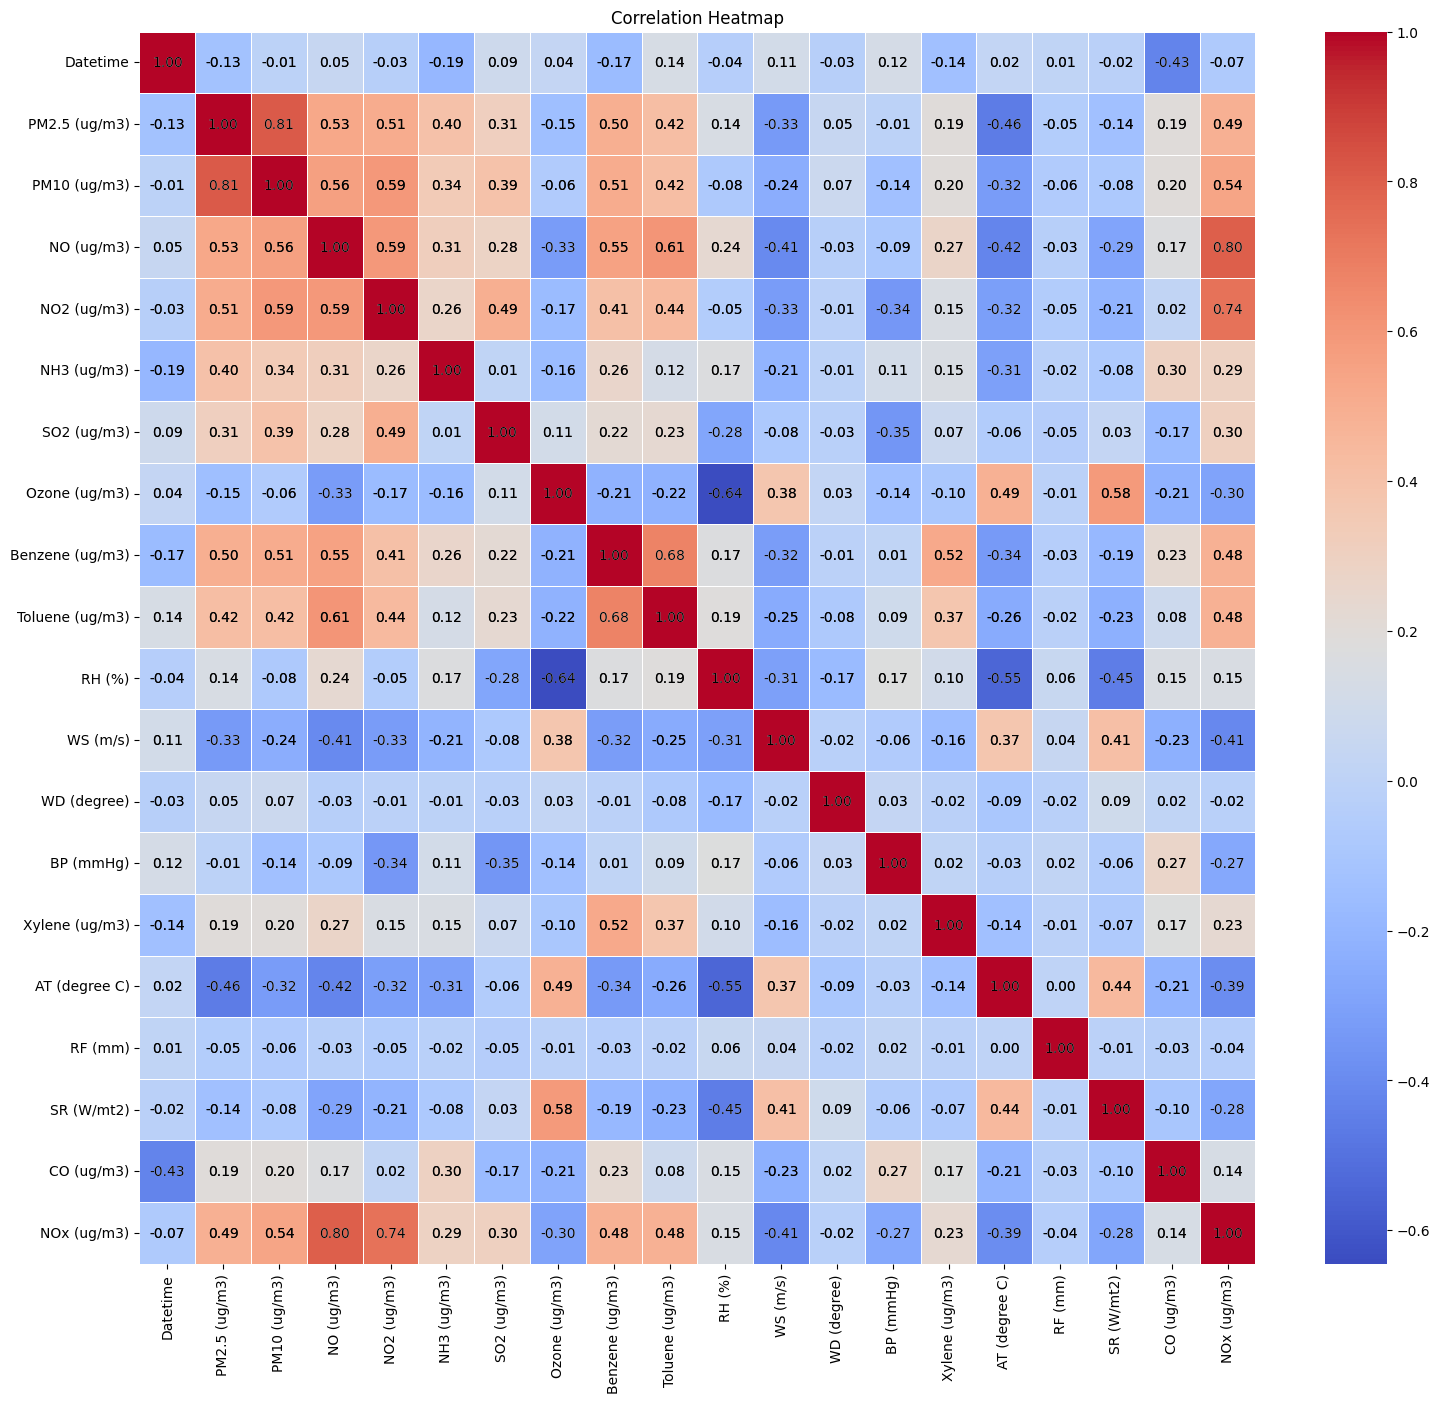

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# Manually annotate the values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

This plot displays features that have strong correlations, such as NOx being highly correlated with NO and NO2.

Likewise, Benzene and Toluene exhibit a strong correlation with each other. Simultaneously, they also show a relatively high correlation with all other particulate matters.

So, let's remove 'NO (ug/m3)', 'NO2 (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)' from the dataset.

#### Remove Features with High Correlation

In [13]:
# Remove columns with high correlation
df = df.drop(['NO (ug/m3)', 'NO2 (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)'], axis=1)

In [14]:
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),RH (%),WS (m/s),WD (degree),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),SR (W/mt2),CO (ug/m3),NOx (ug/m3)
0,2012-11-28 00:00:00,202.611667,NaN,84.7925,11.021250,5.956667,58.237143,0.323333,155.90,877.170000,18.153333,11.1550,NaN,69.714286,5.645000,350.613333
1,2012-11-28 01:00:00,194.000000,NaN,89.8100,12.008750,6.536667,59.962857,0.356667,100.21,852.131429,15.536667,10.5775,NaN,69.718571,8.806667,343.817500
2,2012-11-28 02:00:00,192.430000,NaN,96.4275,14.233750,7.170000,59.664286,0.360000,161.08,852.057143,12.560000,10.3900,NaN,76.097143,6.835000,270.627500
3,2012-11-28 03:00:00,212.041667,NaN,90.4950,28.621250,6.672857,51.830000,0.368333,178.21,852.728571,10.063333,10.2050,NaN,70.944286,4.465000,236.955000
4,2012-11-28 04:00:00,192.778333,NaN,78.1475,21.048889,6.242500,53.070000,0.455714,112.52,852.050000,8.296667,10.0950,NaN,68.554286,9.974000,163.536000


Let's check the histogram of all particulate matters.

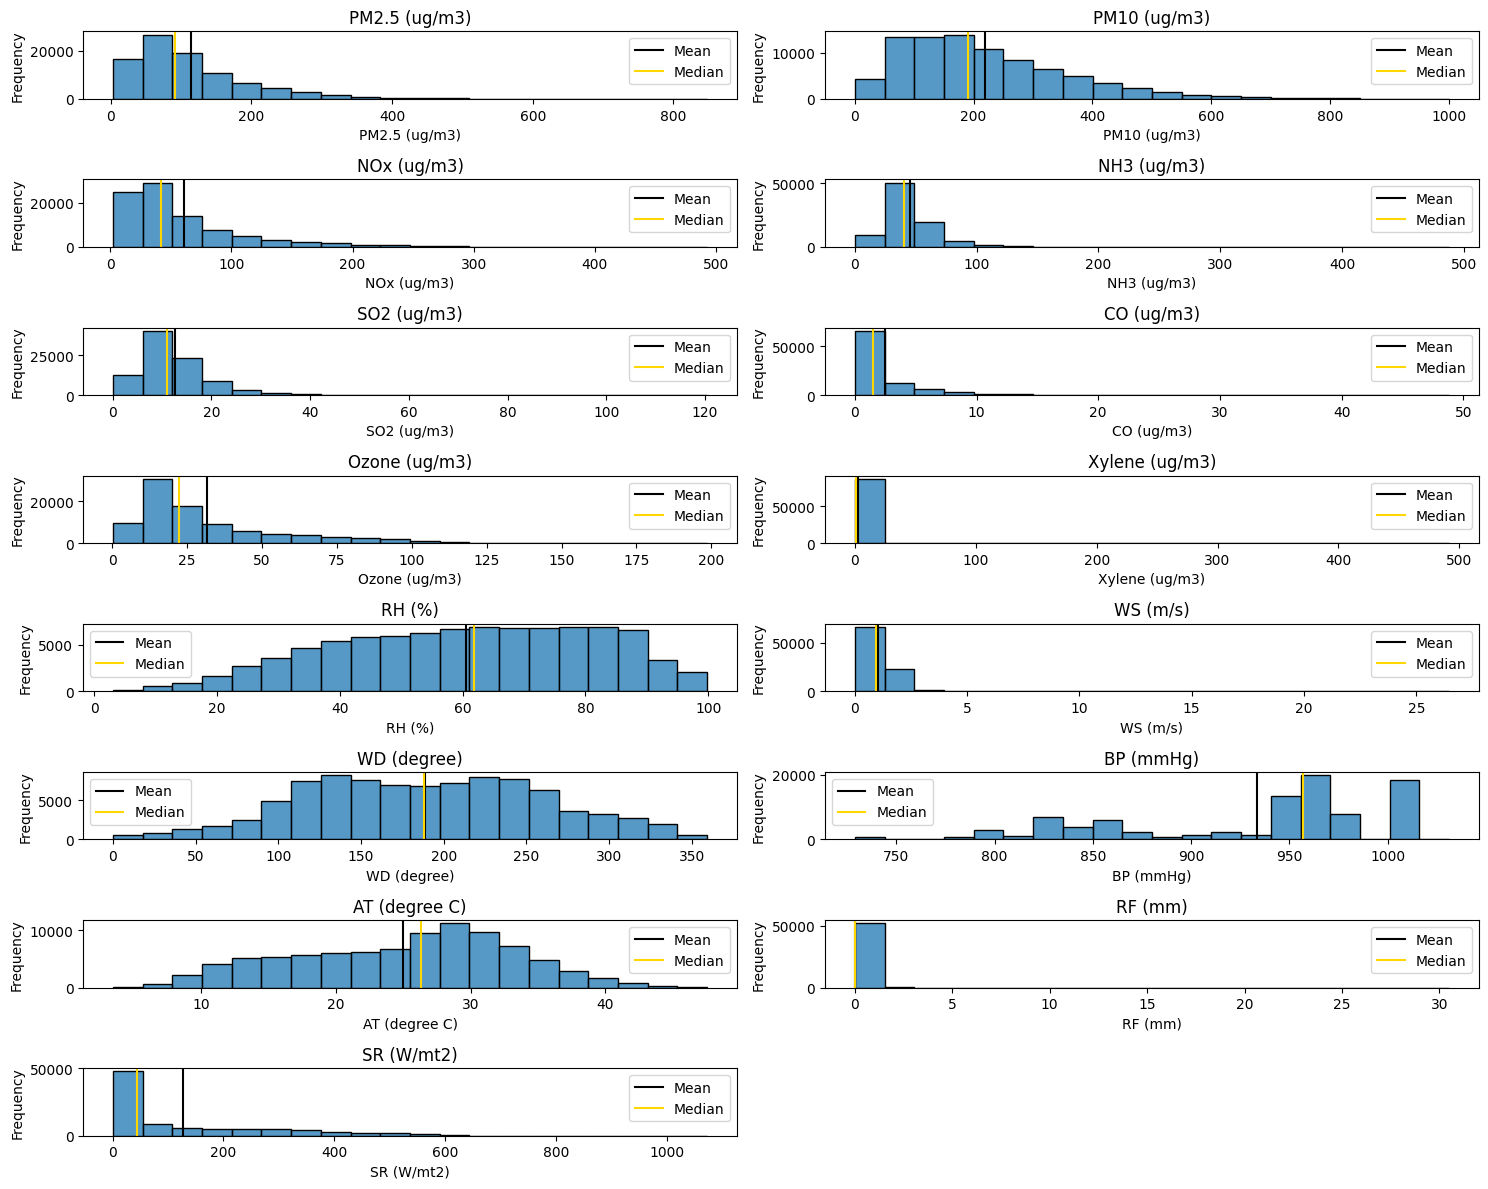

In [15]:
# Histograms: Distribution of Pollutants
selected_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)']

# Calculate the number of rows needed based on the number of selected columns
num_cols = 2
num_rows = len(selected_columns) // num_cols + (len(selected_columns) % num_cols > 0)

# Decreased height of each chart
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 1.5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate through selected columns and plot histograms
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(column)

    # Customize x and y label
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adding mean and median lines
    axes[i].axvline(df[column].mean(), c='black', label='Mean')
    axes[i].axvline(df[column].median(), c='gold', label='Median')
    axes[i].legend()

# Remove empty subplots
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

### Identifying and Removing Outliers:

Outliers have the potential to disrupt analyses and bias results. These are exceptional values that significantly deviate from the rest of the data. Eliminating the impact of such extreme data points allows for more robust and accurate predictions.

<!-- Source: [Author Name or URL] -->

### Data Thresholding for "PM2.5" Concentrations

To manage extreme values and outliers, a thresholding operation has been applied to the "PM2.5 (ug/m3)" column in our dataset. The threshold value is set at 850. The rationale behind this thresholding is to identify and control unusually high concentrations of PM2.5, which might be outliers or data points that could skew the analysis. By masking values exceeding the threshold, we aim to ensure the robustness and reliability of our data for subsequent analyses.

In [16]:
threshold = 850
column_to_update = "PM2.5 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Data Thresholding for "PM10" Concentrations

In our dataset, a thresholding operation has been implemented for the "PM10 (ug/m3)" column. The specified threshold value is set at 975. This thresholding aims to identify and manage exceptionally high concentrations of PM10, which may represent outliers or data points with the potential to impact the analysis. Utilizing the `mask` method, values exceeding the threshold have been masked, contributing to the robustness and reliability of our data for subsequent analyses.

In [17]:
threshold = 975
column_to_update = "PM10 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Data Thresholding for "NOx" Concentrations

For the "NOx (ug/m3)" column, a thresholding operation has been applied with a threshold value of 450. The purpose of this thresholding is to identify and manage values exceeding this threshold, which could potentially be outliers or concentrations that may significantly impact the analysis. By using the `mask` method, values above the threshold have been masked, ensuring the integrity of our data for further analyses.

In [18]:
threshold = 450
column_to_update = "NOx (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

## Thresholding "NH3" Concentrations

Applying a threshold of 250 to the "NH3 (ug/m3)" column, we use the `mask` method to manage values exceeding this threshold. This operation is designed to identify and address potential outliers or concentrations that may significantly influence the analysis, ensuring data integrity for subsequent analyses.

In [19]:
threshold = 250
column_to_update = "NH3 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

### Thresholding "SO2" Concentrations

With a threshold set at 90 for the "SO2 (ug/m3)" column, we employ the `mask` method to handle values surpassing this threshold. This approach aids in identifying and managing potential outliers or concentrations that might significantly impact the analysis. By implementing this thresholding, we ensure data reliability and integrity for subsequent analytical processes.

In [20]:
threshold = 90
column_to_update = "SO2 (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

## Thresholding "CO" Concentrations

Applying a threshold of 15 to the "CO (ug/m3)" column, we utilize the `mask` method to address values exceeding this threshold. This thresholding operation aims to identify and manage potential outliers or concentrations that could significantly impact the analysis. By implementing this approach, we enhance data reliability and integrity for subsequent analytical processes.

In [21]:
threshold = 15
column_to_update = "CO (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

Similar method is applied for other columns with outliers "Ozone (ug/m3)", "Xylene (ug/m3)", "WS (m/s)", "BP (mmHg)", "RF (mm)", "SR (W/mt2)"

In [22]:
threshold = 150
column_to_update = "Ozone (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

In [23]:
threshold = 100
column_to_update = "Xylene (ug/m3)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

In [24]:
threshold = 6
column_to_update = "WS (m/s)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

In [25]:
threshold = 1000
column_to_update = "BP (mmHg)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

In [26]:
threshold = 6
column_to_update = "RF (mm)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

In [27]:
threshold = 750
column_to_update = "SR (W/mt2)"

# Use the mask method
df[column_to_update] = df[column_to_update].mask(df[column_to_update].gt(threshold))

## Pollutant Distribution Histograms

Explore the distribution of key pollutants with histograms for selected columns, including 'PM2.5', 'PM10', 'NOx', 'NH3', 'SO2', 'CO', and others. The layout is customized for clarity, featuring mean and median lines for insights into central tendencies. The visualizations provide a quick overview of pollutant concentration distributions.

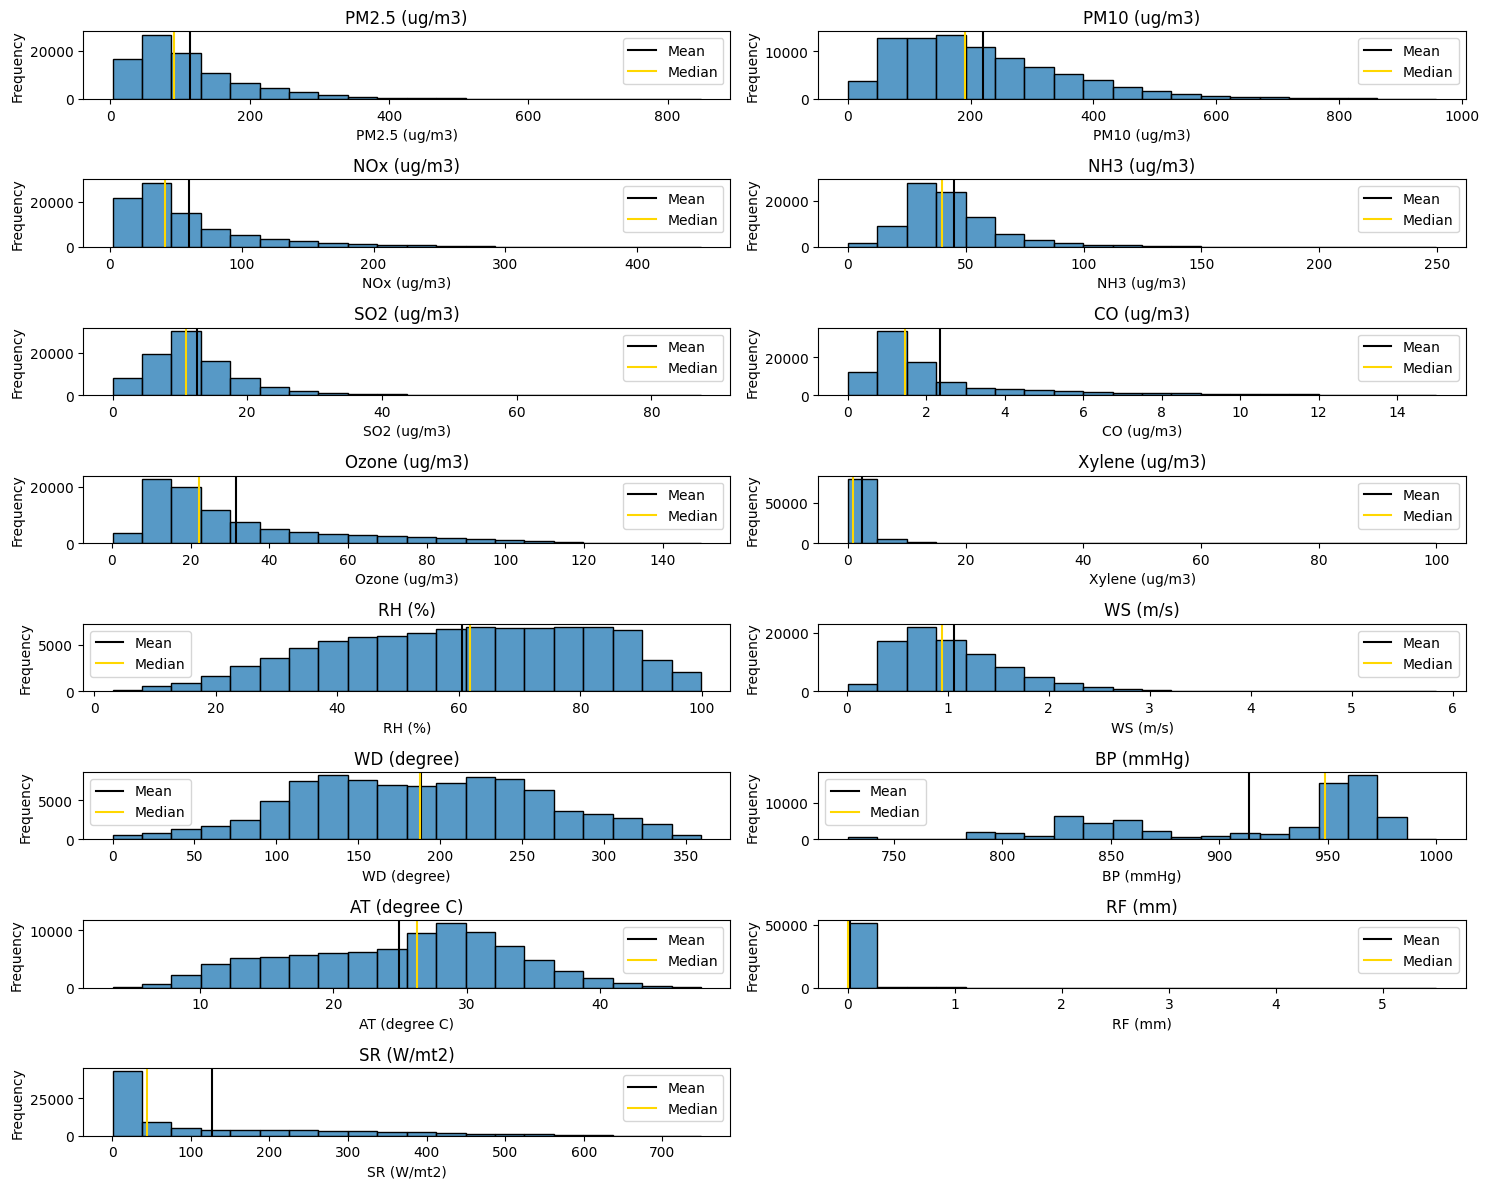

In [28]:
# Histograms: Distribution of Pollutants
selected_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)']

# Calculate the number of rows needed based on the number of selected columns
num_cols = 2
num_rows = len(selected_columns) // num_cols + (len(selected_columns) % num_cols > 0)

# Decreased height of each chart
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 1.5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate through selected columns and plot histograms
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(column)

    # Customize x and y label
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adding mean and median lines
    axes[i].axvline(df[column].mean(), c='black', label='Mean')
    axes[i].axvline(df[column].median(), c='gold', label='Median')
    axes[i].legend()

# Remove empty subplots
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Handle Missing Data (4 Steps Below)

1. Calculate AQI without filling any missing data
2. Iteratively fill missing data of pollutants in the order of pollutant importance, and invoke calculate_aqi for those filled missing records
3. Iteratively fill missing data for rest of the pollutants
4. Fill missing data for remaining records with higher rolling hours data

### 1. Calculate AQI without filling any missing data

In [29]:
# The function is designed to calculate the Air Quality Index (AQI) and perform several related computations, updating the original DataFrame with additional columns representing various AQI-related values. The result is assigned back to the variable df, effectively replacing the original DataFrame with the one modified by the function.
df = calculate_aqi(df)

For each specified air quality parameter (e.g., PM2.5, PM10, SO2, NOx, NH3, CO, Ozone), missing values are filled using a rolling window average over a 3 hours period(`ROLLING_HOURS`). After filling missing values, the `calculate_aqi` function is applied to compute the AQI and related sub-indices.

By doing this we ensure a comprehensive treatment of missing values and provide a consistent AQI calculation across different air quality parameters.

### 2. Iteratively fill missing data of pollutants in the order of pollutant importance, and invoke calculate_aqi for those filled missing records

In [30]:
ROLLING_HOURS = 3

df = fill_missing_with_average(df, ROLLING_HOURS, ['PM2.5 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['PM10 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['SO2 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['NOx (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['NH3 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['CO (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['Ozone (ug/m3)'])
df = calculate_aqi(df)

#### Data Preprocessing: Handling Missing Values for Non-AQI Related Columns

After handling the missing values in "AQI" column, We focus on handling missing values specifically for columns unrelated to the Air Quality Index (AQI). The steps involve:

1. Creating a list (`non_AQI_related_columns`) containing all columns except 'Datetime', 'StationId', and the AQI-related columns.
2. Applying the `fill_missing_with_average` function to fill missing values in the specified non-AQI related columns using a rolling window average over a defined number of hours (`ROLLING_HOURS`).

This ensures that missing values in non-AQI related data are appropriately handled, contributing to a more robust and complete dataset.

### 3. Iteratively fill missing data for rest of the pollutants and meteorological & weather columns

In [31]:
# Get all columns except datetime stationid
non_AQI_related_columns = df.drop(['Datetime', 'AQI', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'SO2 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)'], axis=1).columns.tolist()

df = fill_missing_with_average(df, ROLLING_HOURS, non_AQI_related_columns)

del non_AQI_related_columns
del ROLLING_HOURS

In [32]:
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),RH (%),WS (m/s),WD (degree),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),SR (W/mt2),CO (ug/m3),NOx (ug/m3),AQI
0,2012-11-28 00:00:00,202.611667,NaN,84.792500,11.021250,5.956667,58.237143,0.323333,155.900000,877.170000,18.153333,11.155000,NaN,69.714286,5.645000,350.613333,NaN
1,2012-11-28 01:00:00,198.305833,NaN,87.301250,11.515000,6.246667,59.100000,0.340000,128.055000,864.650714,16.845000,10.866250,NaN,69.716429,7.225833,347.215417,NaN
2,2012-11-28 02:00:00,196.347222,NaN,90.343333,12.421250,6.554444,59.288095,0.346667,139.063333,860.452857,15.416667,10.707500,NaN,71.843333,7.095556,321.686111,NaN
3,2012-11-28 03:00:00,199.490556,NaN,92.244167,18.287917,6.793175,57.152381,0.361667,146.500000,852.305714,12.720000,10.390833,NaN,72.253333,6.702222,283.800000,NaN
4,2012-11-28 04:00:00,199.083333,NaN,88.356667,21.301296,6.695119,54.854762,0.394683,150.603333,852.278571,10.306667,10.230000,NaN,71.865238,7.091333,223.706167,NaN


Now let's focus on addressing the remaining missing values in specific columns. The steps involve:

1. Creating a list (`remaining_missing_columns`) containing columns with remaining missing values, such as 'NO2 (ug/m3)', 'PM10 (ug/m3)', and 'SO2 (ug/m3)'.
2. Applying the `fill_missing_with_average` function to fill missing values in the specified remaining columns using a rolling window average over a defined number of hours (`ROLLING_HOURS`).

### 4. Fill missing data for remaining records with interpolation method

In [33]:
# Fill missing values in 'RF (mm)' column with a default value of 0
df['RF (mm)'] = df['RF (mm)'].fillna(0)

# Interpolate missing values for columns excluding specified ones
df.interpolate(method="linear", inplace=True, limit_direction="both")

### Verify any missing data remaining and then prepare data for Export

Data preparation steps before exporting the DataFrame for Exploratory Data Analysis (EDA):

following steps are performed related to handling missing values in the DataFrame:

1. Calculating the count of missing values for each column in the filtered DataFrame.
2. Ordering the columns based on the count of missing values in descending order.

In [34]:
# Get missing value count for each column in the filtered DataFrame
missing_value_counts = df.isnull().sum()

# Order the records by missing value count in descending order
missing_value_counts = missing_value_counts.sort_values(ascending=True)

print(missing_value_counts)

del missing_value_counts

Datetime          0
CO (ug/m3)        0
SR (W/mt2)        0
RF (mm)           0
AT (degree C)     0
Xylene (ug/m3)    0
BP (mmHg)         0
NOx (ug/m3)       0
WD (degree)       0
RH (%)            0
Ozone (ug/m3)     0
SO2 (ug/m3)       0
NH3 (ug/m3)       0
PM10 (ug/m3)      0
PM2.5 (ug/m3)     0
WS (m/s)          0
AQI               0
dtype: int64


In [35]:
# sanity check
df.head()

,Datetime,PM2.5 (ug/m3),PM10 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),Ozone (ug/m3),RH (%),WS (m/s),WD (degree),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm),SR (W/mt2),CO (ug/m3),NOx (ug/m3),AQI
0,2012-11-28 00:00:00,202.611667,283.84,84.792500,11.021250,5.956667,58.237143,0.323333,155.900000,877.170000,18.153333,11.155000,0.0,69.714286,5.645000,350.613333,325.0
1,2012-11-28 01:00:00,198.305833,283.84,87.301250,11.515000,6.246667,59.100000,0.340000,128.055000,864.650714,16.845000,10.866250,0.0,69.716429,7.225833,347.215417,325.0
2,2012-11-28 02:00:00,196.347222,283.84,90.343333,12.421250,6.554444,59.288095,0.346667,139.063333,860.452857,15.416667,10.707500,0.0,71.843333,7.095556,321.686111,325.0
3,2012-11-28 03:00:00,199.490556,283.84,92.244167,18.287917,6.793175,57.152381,0.361667,146.500000,852.305714,12.720000,10.390833,0.0,72.253333,6.702222,283.800000,325.0
4,2012-11-28 04:00:00,199.083333,283.84,88.356667,21.301296,6.695119,54.854762,0.394683,150.603333,852.278571,10.306667,10.230000,0.0,71.865238,7.091333,223.706167,325.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90624 entries, 0 to 90623
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        90624 non-null  datetime64[ns]
 1   PM2.5 (ug/m3)   90624 non-null  float64       
 2   PM10 (ug/m3)    90624 non-null  float64       
 3   NH3 (ug/m3)     90624 non-null  float64       
 4   SO2 (ug/m3)     90624 non-null  float64       
 5   Ozone (ug/m3)   90624 non-null  float64       
 6   RH (%)          90624 non-null  float64       
 7   WS (m/s)        90624 non-null  float64       
 8   WD (degree)     90624 non-null  float64       
 9   BP (mmHg)       90624 non-null  float64       
 10  Xylene (ug/m3)  90624 non-null  float64       
 11  AT (degree C)   90624 non-null  float64       
 12  RF (mm)         90624 non-null  float64       
 13  SR (W/mt2)      90624 non-null  float64       
 14  CO (ug/m3)      90624 non-null  float64       
 15  NO

## Selected Columns Export

* The provided code snippet selects specific columns from the DataFrame for further analysis or visualization. The selected columns include essential environmental parameters and the Air Quality Index (AQI). These columns are then saved to a CSV file located in the 'data/generated/all_in_one/' directory.
* This step ensures that only the relevant columns are retained for future analyses, making the dataset more manageable and focused on the specific parameters of interest.

In [37]:
# Columns to keep
selected_columns = ["Datetime", "AQI", "PM2.5 (ug/m3)", "PM10 (ug/m3)", "NOx (ug/m3)", "NH3 (ug/m3)", "SO2 (ug/m3)", "CO (ug/m3)", "Ozone (ug/m3)", "Xylene (ug/m3)", "RH (%)", "WS (m/s)", "WD (degree)", "BP (mmHg)", "AT (degree C)", "RF (mm)", "SR (W/mt2)"]

# Create 'generated' folder if not exists
folder_path = 'data/generated/all_in_one/'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the DataFrame to a CSV file with selected columns
df[selected_columns].to_csv('data/generated/delhi_AQI_hourly.csv', index=False)